# Nome: Alex Soares Prestes
# NºUSP: 10407962

# Bibliotecas que serão usadas

In [1]:
# Bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Seção 5
## Regressão Linear

In [2]:
class LinearLeastSquares:
    def __init__(self, X, Y):
        self.X = np.array(X)
        self.Y = np.array(Y)
        self.N = len(X)
        

    def predict(self, X):
        A = np.ones( (len(X), self.order+1) )
        for n in range(self.order+1):
            A[:, n] = X**n
        return A@self.p
        
    
    def regression(self, order = 1):
        self.order = order
        self.A = np.ones( (self.N, self.order+1) )
        for n in range(self.order+1):
            self.A[:, n] = self.X**n
        
        self.p = ((np.linalg.inv(self.A.T@self.A)@self.A.T)@self.Y)


In [3]:
X = np.array([-0.47, -0.26,  0.15,  0.82, -0.60])
Y = np.array([ 1.14,  1.21,  1.28,  1.47,  0.93])

# Ordem 1

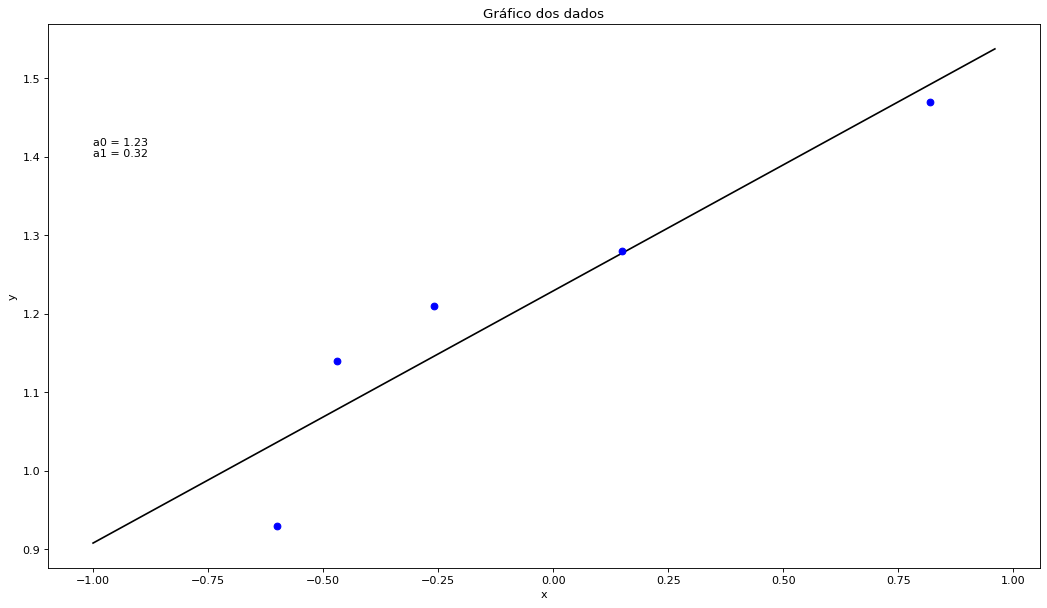

In [4]:
linear = LinearLeastSquares(X, Y)
linear.regression(order = 1)

Xp = np.arange(start = -1, stop = 1, step=2/50)
Yp = linear.predict(Xp)

plt.figure(figsize=(16, 9), dpi=80)
plt.plot(Xp, Yp, "k-")
plt.plot(linear.X,  linear.Y, "bo")
plt.text(-1, 1.4, "\n".join([ "a"+str(i)+" = "+str(round(linear.p[i],2)) for i in range(len(linear.p)) ]) )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico dos dados")
plt.show()

# Ordem 2



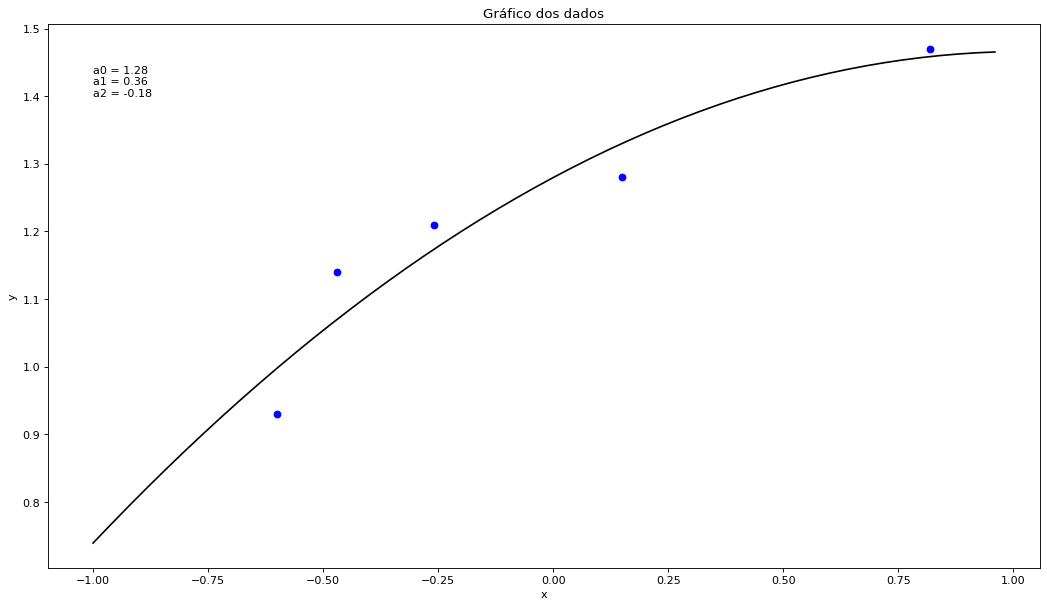

In [5]:
linear = LinearLeastSquares(X, Y)
linear.regression(order = 2)

Xp = np.arange(start = -1, stop = 1, step=2/50)
Yp = linear.predict(Xp)

plt.figure(figsize=(16, 9), dpi=80)
plt.plot(Xp, Yp, "k-")
plt.plot(linear.X,  linear.Y, "bo")
plt.text(-1, 1.4, "\n".join([ "a"+str(i)+" = "+str(round(linear.p[i],2)) for i in range(len(linear.p)) ]) )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico dos dados")
plt.show()

# Ordem 3

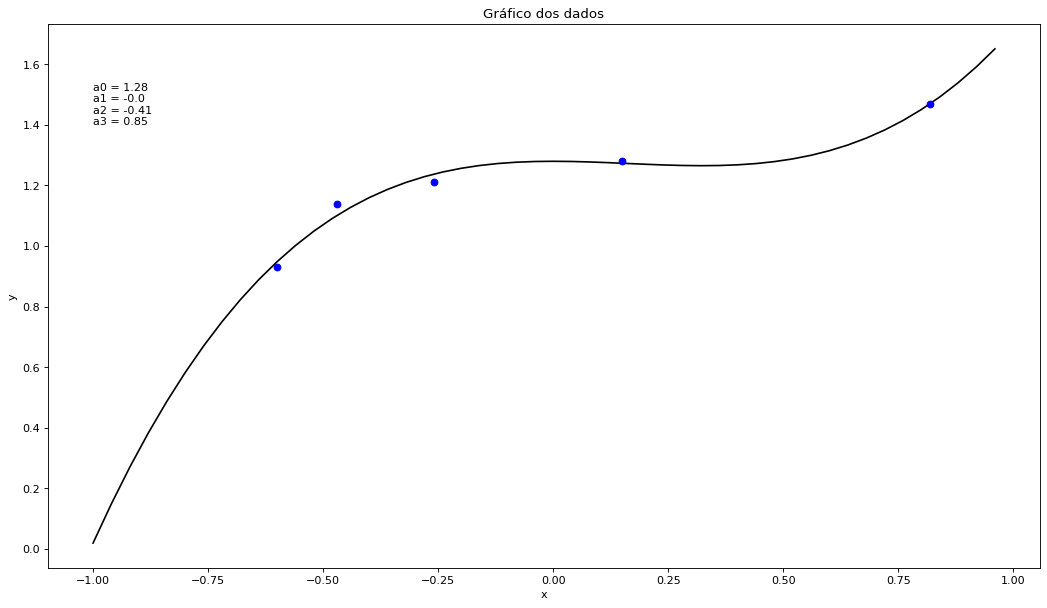

In [ ]:
linear = LinearLeastSquares(X, Y)
linear.regression(order = 3)

Xp = np.arange(start = -1, stop = 1, step=2/50)
Yp = linear.predict(Xp)

plt.figure(figsize=(16, 9), dpi=80)
plt.plot(Xp, Yp, "k-")
plt.plot(linear.X,  linear.Y, "bo")
plt.text(-1, 1.4, "\n".join([ "a"+str(i)+" = "+str(round(linear.p[i],2)) for i in range(len(linear.p)) ]) )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico dos dados")
plt.show()

# Seção 6
## Regressão Não Linear

In [ ]:
class NonLinearLeastSquares:
    def __init__(self, X, Y):
        self.X = np.array(X)
        self.Y = np.array(Y)
        self.N = len(X)

    def predict(self, X):
        return self.p[0]*np.exp(self.p[1]*X)
    
    def regression(self):
        self.A = np.ones( (self.N, 2) )
        ln_Y = np.log(self.Y)
        self.A[:, 1] = self.X

        self.p = ((np.linalg.inv(self.A.T@self.A)@self.A.T)@ln_Y)
        self.p[0] = np.exp(self.p[0])


In [ ]:
X = np.array([ 0.20, 0.30, 0.40, 0.60, 0.90])
Y = np.array([ 0.61, 0.67, 0.75, 0.91, 1.23])

# $$y = a_0 e^{a_{1}x}$$

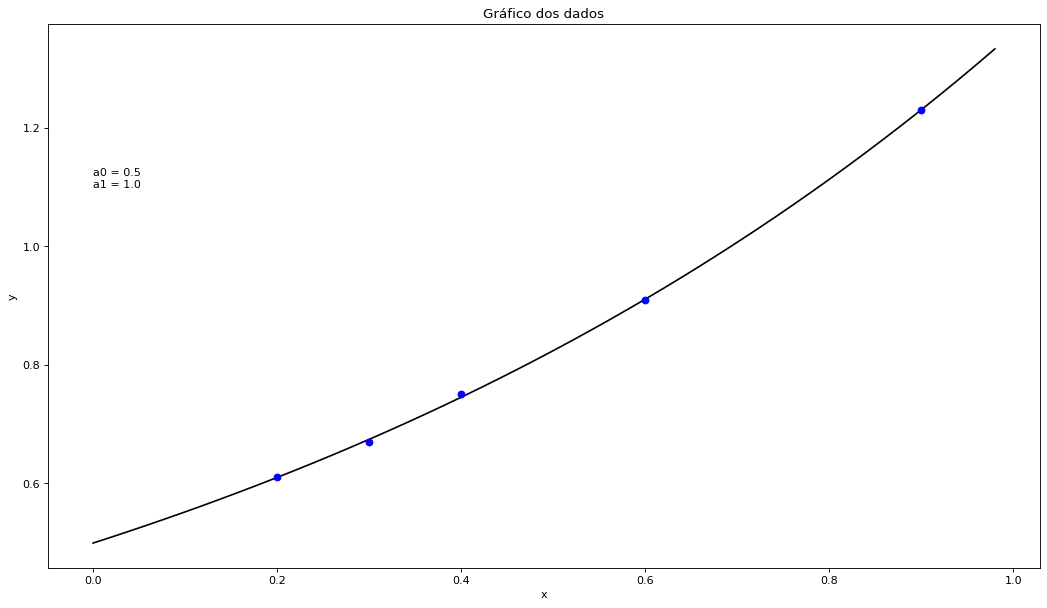

In [ ]:
non_linear = NonLinearLeastSquares(X, Y)
non_linear.regression()

Xp = np.arange(start = 0.0, stop = 1.0, step=1/50)
Yp = non_linear.predict(Xp)

plt.figure(figsize=(16, 9), dpi=80)
plt.plot(Xp, Yp, "k-")
plt.plot(non_linear.X,  non_linear.Y, "bo")
plt.text(0.0, 1.1, "\n".join([ "a"+str(i)+" = "+str(round(non_linear.p[i],2)) for i in range(len(non_linear.p)) ]) )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico dos dados")
plt.show()

# Seção 7
## Regressão de Superficie

In [105]:
class SurfaceLeastSquares:
    def __init__(self, X, Y, Z):
        self.shape = X.shape
        self.N = self.shape[0]*self.shape[1]
        self.X = X.reshape( (self.N,) )
        self.Y = Y.reshape( (self.N,) )
        self.Z = Z.reshape( (self.N,) )

    def predict(self, X, Y):
        mat_shape = X.shape
        N = mat_shape[0]*mat_shape[1]
        X = X.reshape( (N,) )
        Y = Y.reshape( (N,) )
        A = np.ones( (N, 6) )
        A[:, 1] = X
        A[:, 2] = Y
        A[:, 3] = X*Y
        A[:, 4] = X**2
        A[:, 5] = Y**2
        return (A@self.p[:, np.newaxis]).reshape( mat_shape )
    
    def regression(self):
        self.A = np.ones( (self.N, 6) )
        self.A[:, 1] = self.X
        self.A[:, 2] = self.Y
        self.A[:, 3] = self.X*self.Y
        self.A[:, 4] = self.X**2
        self.A[:, 5] = self.Y**2

        self.p = ((np.linalg.inv(self.A.T@self.A)@self.A.T)@self.Z)


In [116]:
def surf_noise(X, Y, p):
    mat_shape = X.shape
    X = X.reshape( (X.shape[0]*X.shape[1], ) )
    Y = Y.reshape( (Y.shape[0]*Y.shape[1], ) )
    A = np.ones( (len(X), 6) )
    A[:, 1] = X
    A[:, 2] = Y
    A[:, 3] = X*Y
    A[:, 4] = X**2
    A[:, 5] = Y**2
    Z = A@p + np.random.rand( (mat_shape[0]*mat_shape[1]) )
    Z = (Z[:, np.newaxis]).reshape( mat_shape )

p = np.array( [0.9, 2.2, -1.3, 2.4, 0.5, 4.6] )
x = np.linspace(-10.0, 10.0, 5)
y = np.linspace(-10.0, 10.0, 5)

X, Y = np.meshgrid(x, y)

Z = surf(X, Y, p)

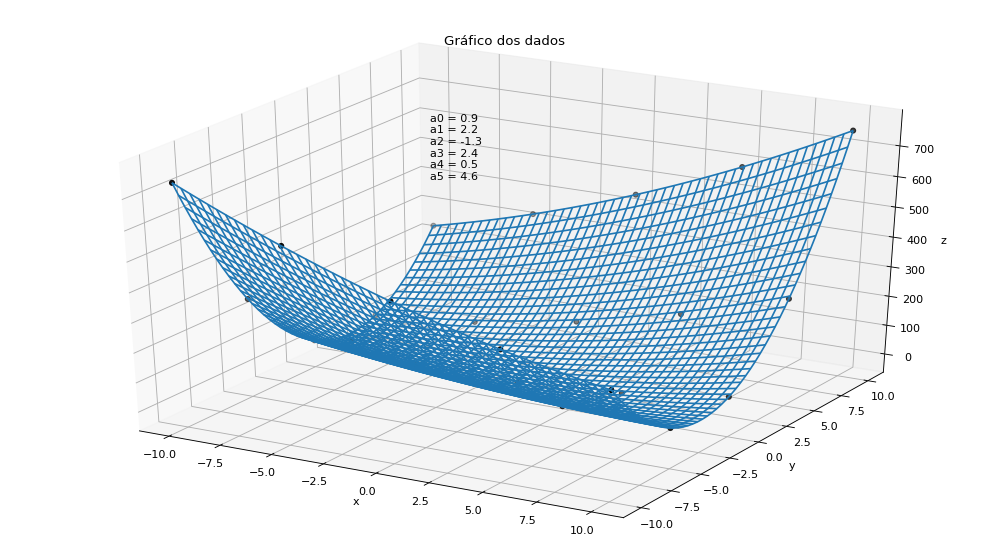

In [117]:
surface = SurfaceLeastSquares(X, Y, Z)
surface.regression()

xp = np.linspace(-10.0, 10.0)
yp = np.linspace(-10.0, 10.0)
Xp, Yp = np.meshgrid(xp, yp)
Zp = surface.predict(Xp, Yp)

fig = plt.figure(figsize=(16, 9), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X, Y, Z, c='k')
ax.plot_wireframe(Xp, Yp, Zp)
ax.text3D(-5.0, 1.5, 600, "\n".join([ "a"+str(i)+" = "+str(round(surface.p[i],3)) for i in range(len(surface.p)) ]) )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gráfico dos dados")
plt.show()